In [1]:
from sklearn.datasets import load_boston


boston = load_boston()

print(boston.keys())
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [2]:
import pandas as pd

boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
print(boston_df.head())


boston_target = pd.DataFrame(data=boston.target)
print(boston_target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


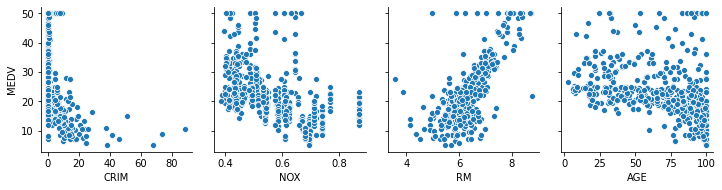

In [3]:
import seaborn as sns

%matplotlib inline

boston_df['MEDV'] = boston.target

sns.pairplot(boston_df, x_vars=['CRIM', 'NOX', 'RM', 'AGE'], y_vars=['MEDV'])

boston_df[['RM','MEDV']].corr()

In [4]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(boston_df[['RM']], boston_df['MEDV'], test_size=0.3)

print(boston_df['RM'].shape)

print(x_train.shape)

print(x_test.shape)

(506,)
(354, 1)
(152, 1)


In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

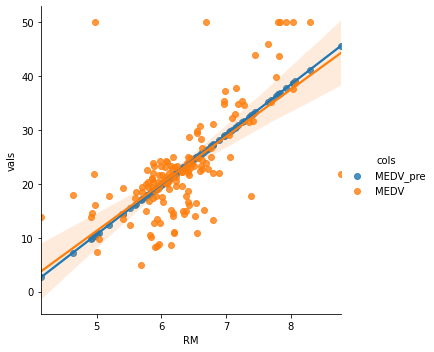

In [6]:
y_pred = lr.predict(x_test)

df = pd.DataFrame(data=dict(x_test))
df['MEDV_pre'] = y_pred
df['MEDV'] = y_test

df = df.melt('RM', var_name='cols',  value_name='vals')

sns.lmplot(data=df, x='RM', y='vals', hue='cols')

In [7]:
lr.score(x_test, y_test)

0.4541991453614783